# Institute of Data - Capstone Project - Customer Churn

## Table of Contents
<ul>
    <li><a href="#introduction">Introduction</a></li>
    <li><a href="#data_wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#data_dictionary">Data Dictionary</a></li>
    </ul>
    <li><a href="#exploratory">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#categorical_eda">Categorical EDA</a></li>
        <li><a href="#numerical_eda">Numerical EDA</a></li>
        <li><a href="#customer_churn_eda">Customer Churn EDA</a></li>
    </ul>
    <li><a href="#modeling">Modeling</a></li>
    <ul>
        <li><a href="#pre-processing">Pre-Processing</a></li>
        <li><a href="#model_selection">Model Selection</a></li>
    </ul>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

## Introduction <a id='introduction'></a>

Customer churn is a metric used to quantify the rate at which customers are leaving the business. It is an important metric in a business sense, as it's estimated that the cost of acquiring new customers being 1/5th the cost of keeping existing ones. On this point alone, it makes sense for a business to implement strategies of keeping customers and reducing their likelihood of churning.

The rise of digital and ‘neo-banks’ in the Australian banking space, has resulted in a renewed focus on customer churn within banks, as customers are presented with more options as to who they bank with. Coupled with the ease of online research and applications, switching banks has never been easier for customers. It makes sense given the costs of customer churn, that banks divert resources and attention into analysing their customers behaviour and employing Machine Learning algorithms to successfully predict those that’ll churn.

This notebook will address the customer churn problem facing banks, by use of the following [dataset](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers) from Kaggle. This problem will be addressed by building a predictive model, with the aim of successfully predicting whether a customer will churn or not. A bank would then be able to use this information to appropriately implement strategies to prevent the customer from churning, where successful implementation of a predictive model and subsequent strategy would see a reduction in costs, increased revenue, and increased customer satisfaction.

In [1]:
## MODULES

# Core Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Catboost
from catboost import CatBoostClassifier

# XGBoost
import xgboost as xgb

# Imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# SkLearn
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler

# Custom Modules
import custom_code
import helpers
from show_summary_report import show_summary, show_summary_report

# Show plots inline
%matplotlib inline

# Pandas Options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Plot Styling
sns.set(style='darkgrid')

## Data Wrangling <a id='data_wrangling'></a>

In [2]:
# Import Data

df = pd.read_csv('dataset/BankChurners.csv')

# Explore DataFrame

display(df.head())

# Shape
display(df.shape)

# Columns
display(df.columns)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


(10127, 23)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Dataset contains 10,127 rows and 23 columns.

### Data Dictionary <a id='data_dictionary'></a>

- **Attrition_Flag**: Flag to show whether the client is current or has closed accounts with the bank
- **Customer_Age**: Customer Age in years
- **Gender**: M = Male, F = Female
- **Dependent_count**: Number of dependents the customer has
- **Education_Level**: Highest educational attainment of customer
- **Marital_Status**: Marital Status (Married/Single/Divorced/Unknown)
- **Income_Category**: Annual income category the customer falls in
- **Card_Category**: Type of card held (Blue, Silver, Gold, Platnium)
- **Months_on_book**: Period of relationship with bank
- **Total_Relationship_Count**: Number of products held by customer
- **Months_Inactive_12_mon**: Number of inactive months in the past 12 months
- **Contacts_Count_12_mon**: Number of times contacted in the last 12 months
- **Credit_Limit**: Credit limit on customers credit card
- **Total_Revolving_Bal**: Total revolving balance on the credit card
- **Avg_Open_To_Buy**: Open to buy credit line (average of last 12 months)
- **Total_Amt_Chng_Q4_Q1**: Change in transaction amount (Q4 over Q1)
- **Total_Trans_Amt**: Total transaction amount (last 12 months)
- **Total_Trans_Ct**: Number of transactions (last 12 months)
- **Total_Ct_Chng_Q4_Q1**: Change in transaction count (Q4 over Q1)
- **Avg_Utilization_Ratio**: Average caard utilisation ratio

There is a good amount of information related to the customers in this dataset, that may have an impact as to whether or not the customer will churn from the bank. The target variable for this analysis is *Attrition_Flag*, where I'll be coding 1 to represent a customer that has churned, and 0 to represent the converse.

The last 2 columns of this dataset should be ignored and will be dropped. I'll also drop the CLIENTNUM column as it serves no purpose in the analysis I'm going to do.

In [3]:
# Drop columns that aren't needed

df.drop(df.columns[[0, 21, 22]], axis=1, inplace=True)

# Check output

df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [4]:
# Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

There aren't any null values in this dataset, though I'll need to check if there are any values that appear incorrect. For example a value of 0 in Age would be an incorrect value.

In terms of data types, all variables are correctly classified.

In [5]:
# Describe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


Reviewing the above table, it appears as though there aren't any unexpected values in each numeric column. The min and max values of each column seem reasonable.

Unfortunately there is limited information on exactly what some of the columns mean. For example the 'Avg_Open_To_Buy' column is quite ambiguious in it's definition provided upon sourcing the dataset.

I can dig into the data a little further, by exploring some of the folowing questions:

- Do customers with higher credit limits, tend to utilise their card more?
- Do customers with higher credit limits, tend to have a higher number of transactions?
- Do customers with higher number of dependents, tend to have higher number of transactions?

This information may be useful in better understanding our customers spending habits, to assist in developing a marketing strategy to reduce customer churn.

Potentially some useful new columns to engineer:
- Transaction Amount as a proportion of Credit Limit
- Credit limit per dependent

### REVIEW ABOVE FOR EXTRA STEPS TO TAKE

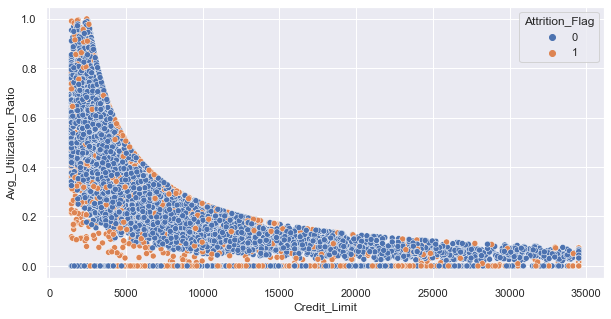

In [32]:
fig, axes = plt.subplots(figsize=(10,5))

sns.scatterplot(data=df, x='Credit_Limit', y='Avg_Utilization_Ratio', hue='Attrition_Flag', ax=axes)
plt.show()

In [31]:
df[df.Credit_Limit > 33000]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,0,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
45,0,49,M,4,Uneducated,Single,$80K - $120K,Blue,30,3,2,3,34516.0,0,34516.0,1.621,1444,28,1.333,0.000
61,1,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000
65,0,51,M,4,Uneducated,Single,$80K - $120K,Silver,38,4,1,4,34516.0,1515,33001.0,0.592,1293,32,0.600,0.044
70,0,51,M,4,Graduate,Single,$120K +,Blue,42,3,2,3,34516.0,1763,32753.0,1.266,1550,41,1.050,0.051
81,0,44,M,1,Unknown,Unknown,$120K +,Blue,36,6,2,2,34516.0,1533,32983.0,0.924,1603,29,0.526,0.044
84,0,53,M,1,Graduate,Divorced,$80K - $120K,Blue,35,5,4,2,34516.0,1219,33297.0,1.129,1590,27,2.000,0.035
101,0,41,F,3,Unknown,Married,Unknown,Silver,34,5,3,3,34516.0,2053,32463.0,1.034,1487,26,0.733,0.059
106,0,53,M,2,Post-Graduate,Single,$120K +,Blue,36,6,1,2,34516.0,931,33585.0,0.828,1022,21,1.100,0.027
109,0,54,M,4,Unknown,Divorced,$120K +,Blue,36,6,3,2,33791.0,1960,31831.0,0.618,1047,31,0.824,0.058


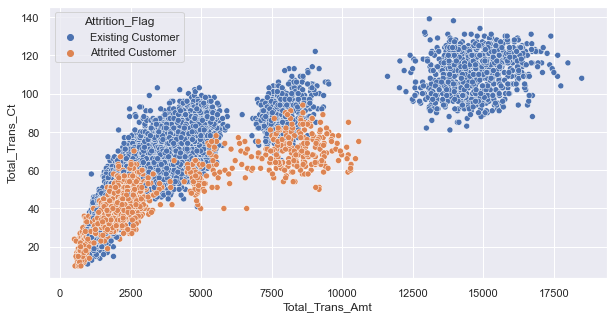

In [7]:
fig, axes = plt.subplots(figsize=(10,5))

sns.scatterplot(data=df, y='Total_Trans_Ct', x='Total_Trans_Amt', hue='Attrition_Flag', ax=axes)
plt.show()

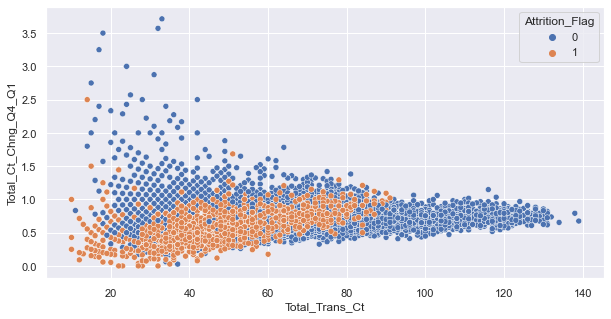

In [27]:
fig, axes = plt.subplots(figsize=(10,5))

sns.scatterplot(data=df, x='Total_Trans_Ct', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag', ax=axes)
plt.show()

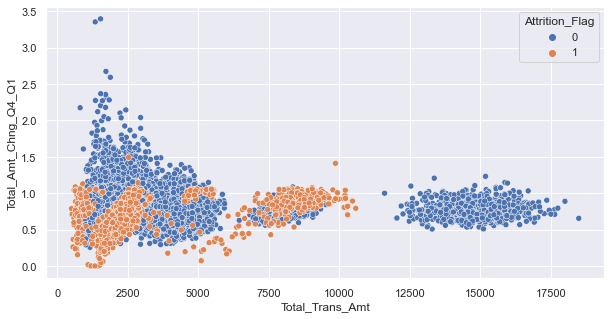

In [28]:
fig, axes = plt.subplots(figsize=(10,5))

sns.scatterplot(data=df, x='Total_Trans_Amt', y='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag', ax=axes)
plt.show()

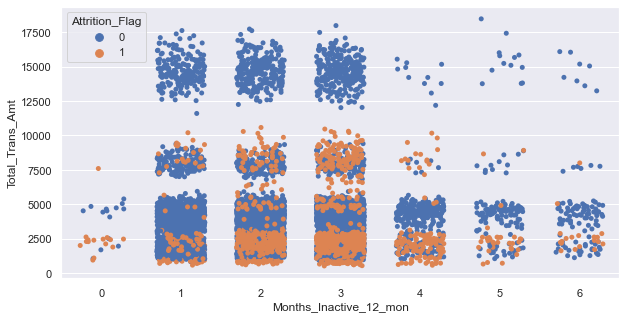

In [38]:
fig, axes = plt.subplots(figsize=(10,5))

sns.stripplot(data=df, y='Total_Trans_Amt', x='Months_Inactive_12_mon', jitter=0.3, hue='Attrition_Flag', ax=axes)
plt.show()

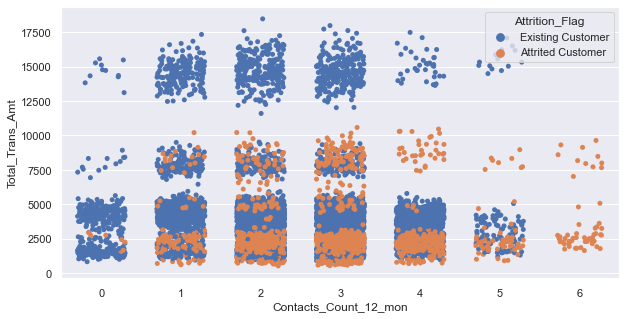

In [10]:
fig, axes = plt.subplots(figsize=(10,5))

sns.stripplot(data=df, y='Total_Trans_Amt', x='Contacts_Count_12_mon', jitter=0.3, hue='Attrition_Flag', ax=axes)
plt.show()

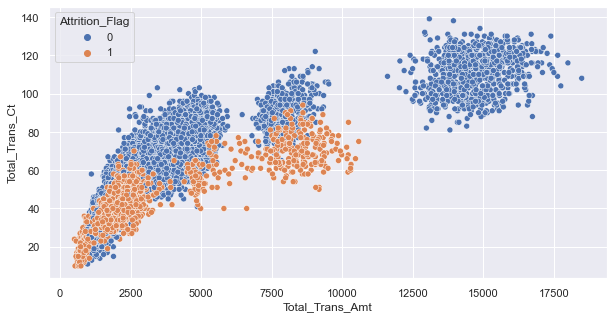

In [59]:
# Potential Winner

fig, axes = plt.subplots(figsize=(10,5))

sns.scatterplot(data=df, y='Total_Trans_Ct', x='Total_Trans_Amt', hue='Attrition_Flag',ax=axes)
plt.show()

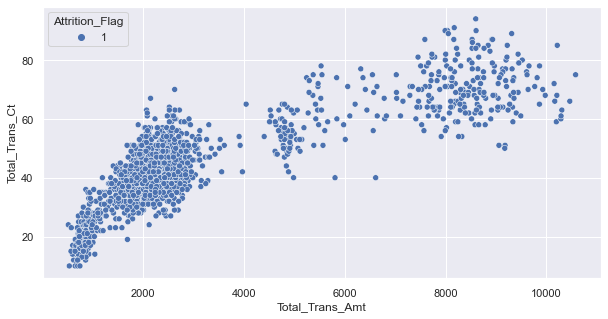

In [61]:
df_subset = df[df.Attrition_Flag == 1]

fig, axes = plt.subplots(figsize=(10,5))

sns.scatterplot(data=df_subset, y='Total_Trans_Ct', x='Total_Trans_Amt', hue='Attrition_Flag',ax=axes)
plt.show()

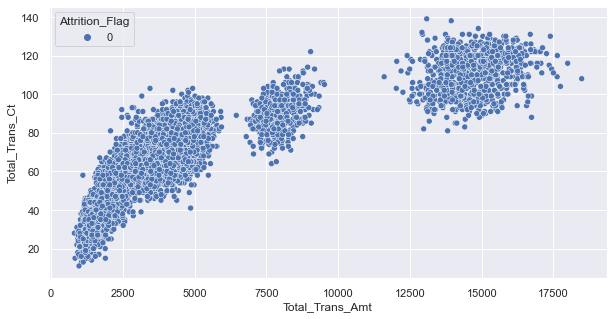

In [62]:
df_subset = df[df.Attrition_Flag == 0]

fig, axes = plt.subplots(figsize=(10,5))

sns.scatterplot(data=df_subset, y='Total_Trans_Ct', x='Total_Trans_Amt', hue='Attrition_Flag',ax=axes)
plt.show()

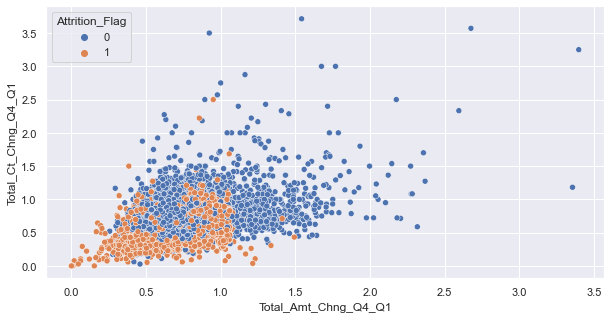

In [49]:
fig, axes = plt.subplots(figsize=(10,5))

sns.scatterplot(data=df, y='Total_Ct_Chng_Q4_Q1', x='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag', ax=axes)
plt.show()

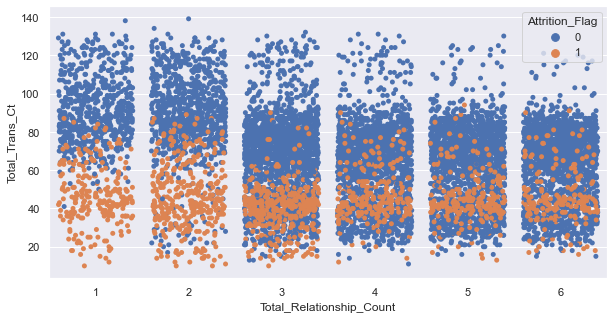

In [65]:
## WINNER

fig, axes = plt.subplots(figsize=(10,5))

sns.stripplot(data=df, x='Total_Relationship_Count', y='Total_Trans_Ct', jitter=0.4, hue='Attrition_Flag', ax=axes)
plt.show()

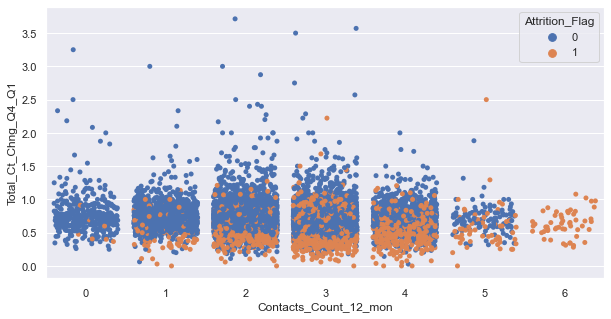

In [67]:
fig, axes = plt.subplots(figsize=(10,5))

sns.stripplot(data=df, x='Contacts_Count_12_mon', y='Total_Ct_Chng_Q4_Q1', jitter=0.4, hue='Attrition_Flag', ax=axes)
plt.show()

In [13]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [15]:
# Summarise

helpers.summarise(df).sort_values(by='n_unique', ascending=False)

,n_missing,p_missing,n_unique,dtype
Avg_Open_To_Buy,0,0.0,6813,float64
Credit_Limit,0,0.0,6205,float64
Total_Trans_Amt,0,0.0,5033,int64
Total_Revolving_Bal,0,0.0,1974,int64
Total_Amt_Chng_Q4_Q1,0,0.0,1158,float64
Avg_Utilization_Ratio,0,0.0,964,float64
Total_Ct_Chng_Q4_Q1,0,0.0,830,float64
Total_Trans_Ct,0,0.0,126,int64
Customer_Age,0,0.0,45,int64
Months_on_book,0,0.0,44,int64


The above confirms again no null values, as well as shows that all the categorical variables will be useful as they have a low number of categories - Education Level is the highest with 7.

The large number of unique values in the numeric columns could mean that applying some binning to these variables may improve performance in our models.

Note that the *helpers.summarise* is a function from custom code.

In [16]:
# Check Categorical Columns

round(df.describe(exclude = ['float', 'int64']),2)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


The above table tells me that a typical customer is current, female, graduate, married, earns less than $40k and has a Blue credit card.

In [17]:
# Convert Attrition_Flag to 0 = Current Customer & 1 = Churned Customer

df.Attrition_Flag = df.Attrition_Flag.replace('Existing Customer', 0)
df.Attrition_Flag = df.Attrition_Flag.replace('Attrited Customer', 1)

The above was done to convert the target variable column to 0 and 1 values. This is required for machine learning models. 0 represents current customer and 1 represents churned customer.

Below I'll extract out the numeric and categorical column names, as this will be useful for further analysis.

In [18]:
# List of columns with unique values <= 7

discrete_cols = [col for col in df.columns if df[col].nunique() <= 7]
discrete_cols.remove('Attrition_Flag')

# List of all other columns
contin_cols = [col for col in df.columns if col not in discrete_cols]
contin_cols.remove('Attrition_Flag')

In order to understand if I need to do any data wrangling on the categorical columns, I first need to see what values make up these variables. I'll loop through the categorical columns and display value counts.

In [10]:
# # Loop through categorical columns and display value counts

# for col in discrete_cols:
#     display(df[col].value_counts())
#     print('-'*35)

There are a large number of 'Unknown' values in 3/5 of the categorical columns.

## Exploratory Data Analysis <a id='exploratory'></a>

The target variable in this analysis is the 'Attrition_Flag' column, which tells me which customers are current and which ones have churned. I'll begin by understanding the split between these two values, and will achieve this using a bar plot.

#### Target Variable - Churned Customers

In [11]:
# # Create Figure & Axes

# fig, ax = plt.subplots(figsize=(10,8))

# # Draw Countplot

# sns.countplot(data=df, x='Attrition_Flag', ax=ax)

# # Formatting

# ax.set_title('Number of Churned Customers', fontsize=16, fontweight='bold')
# ax.set_xlabel('')
# ax.set_ylabel('')
# ax.set_xticklabels(['Current Customer', 'Churned Customer'])
# sns.despine(fig=fig, bottom=True)

# # Show Plot

# plt.tight_layout()
# plt.show()

# # Table

# helpers.find_frequency(df.Attrition_Flag)

The data I'm working with has a much larger number of current customers, relative to amount of customers that have churned (84% vs 16%). This imbalance will impact the performance of our machine learning models, meaning I'll need to address this imbalance using techniques such as under or oversampling. 

Let's now get an overview of all the feature variables.

### Categorical EDA <a id='categorical_eda'></a>

In [12]:
# # Instantiate figure

# plt.figure(figsize=(15, 20))
# plt.subplots_adjust(hspace=0.5)

# # Loop through the length of columns and keep track of index

# for n, col in enumerate(discrete_cols):
#     # Add a new subplot iteratively
#     ax = plt.subplot(7,2, n+1)
    
#     # Plot histogram on new subplot
#     sns.countplot(data=df, x=col, ax=ax,
#                  order = df[col].value_counts().index)
    
#     # chart formatting
#     ax.set_title(col.upper())
#     ax.set_xlabel("")
#     ax.set_ylabel("")

#     plt.tight_layout()

**Key Observations:**
- Close to even split of Male and Female Customers
- Most customers have at least one dependent
- Multiple education levels, with Graduate being the most common
- Most customers are Married or Single
- Most customers earn less than \$40k
- Most customers are on the 'Blue' Card
- 3 Products is the most common holding for customers
- 3 months is the most common amount of months for a customer to be inactive. Small number in >4 months.
- The bank tends to not contact customers more than 4 times in a 12 month period

I will need to encode these variables prior to training any machine learning models. One-Hot Encoding can be used on Gender & Martial Status and Ordinal Encoding on Education, Income and Card Category.

### Numerical EDA <a id='numerical_eda'></a>

There are 15 numerical columns, which I'll initially explore using a combination of histograms and boxplots. This'll provide some insight as to their distribution shape, as well as any potential outliers. 

###### Histograms

In [13]:
# # Instantiate figure

# plt.figure(figsize=(15, 20))
# plt.subplots_adjust(hspace=0.5)

# # Loop through the length of columns and keep track of index

# for n, col in enumerate(contin_cols):
#     # Add a new subplot iteratively
#     ax = plt.subplot(7,4, n+1)
    
#     # Plot histogram on new subplot
#     sns.histplot(data=df, x=col, ax=ax)
    
#     # chart formatting
#     ax.set_title(col.upper())
#     ax.set_xlabel("")
#     ax.set_ylabel("")

#     plt.tight_layout()

**Key Observations:**
- Customer Age is the most normally distributed out of all the numeric variables
- Months_On_Book shows that there is a substantial amount of customers in this dataset that have been with the bank for 36 months. This may be due to a marketing push done by the bank around that time to acquire new customers.
- Credit Limit & AVG_OPEN_TO_BUY have a very similar distribution. With what seems to be a large number of outliers at their tails.
- Lots of customers appear to have a low balance on their credit card, then the distribution is fairly normal, with a spike at the tail. This spike may be the customers with a higher credit limit.
- Change in transaction amount and count shows that most customers in this dataset transacted less in both amount and count, over the Q4 to Q1 period.
- Total transaction amount displays a multi modal distribution, with 4 apparent peaks. This would be a good variable to explore further, to better understand customers spending habits. The transaction count distribution only has 2 peaks.

###### Boxplots

In [14]:
# ### Instantiate figure

# plt.figure(figsize=(15, 20))
# plt.subplots_adjust(hspace=0.5)

# # Loop through the length of columns and keep track of index

# for n, col in enumerate(contin_cols):
#     # Add a new subplot iteratively
#     ax = plt.subplot(7,3, n+1)
    
#     # Plot histogram on new subplot
#     sns.boxplot(data=df, x=col, ax=ax)
    
#     # chart formatting
#     ax.set_title(col.upper())
#     ax.set_xlabel("")

#     plt.tight_layout()

Boxplots are useful to visually observe the outliers present in a distribution. I can see from the above plots that some of the variables in this dataset contain a large number of outliers. These outliers are mainly present in variables that describe a customers spending habits.

Income and Spending habits tend to be highly skewed distributions, given the disparity and inequality in incomes amongst individuals. Given that, we'd expect to see outliers of this nature.

### Customer Churn EDA <a id='customer_churn_eda'></a>

The above graphs have given a sense of the distribtuion of each individual variable on it's own. I'll now move to exploring how these variables relate to the target variable of whether a customer has churned or not.

For the discrete variables, I'll look at the countplot and barplot side by side, showing the mean value of the target variable in the bar plot. This'll give a sense of whether the variable impacts the customer churn.

For the continous varibles, I'll look at the kdeplot and boxplot side by side, with the target variable seperated out by colour. This will also allow me to see any relationship between customer churn and the respective variable.

In [15]:
# for col in discrete_cols:
#     helpers.plot_discrete(df, col, 'Attrition_Flag')

**Key Observations:**
- Customers with Doctorates appear the most likely to churn
- Customers with 3 or more dependents are the least likely to churn
- Customers inactive for 4 months are most likely to churn. Seems as though all customers have been inactive for at least 1 month.
- All customers that were contacted 6 times churned.

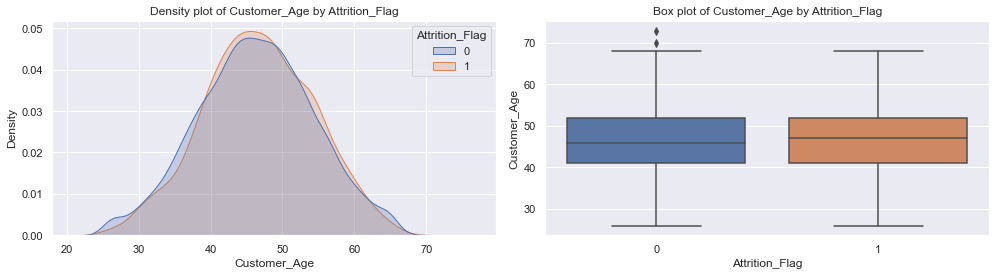

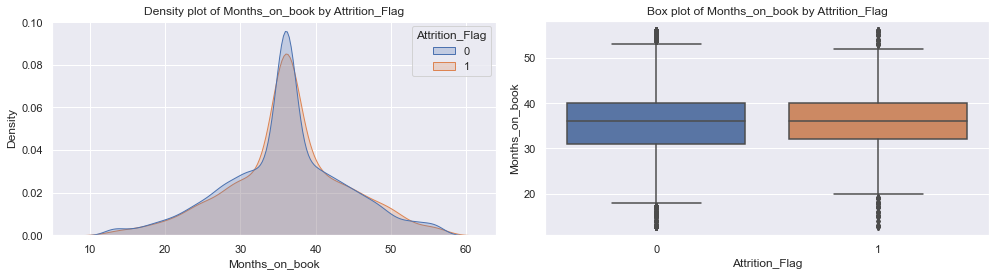

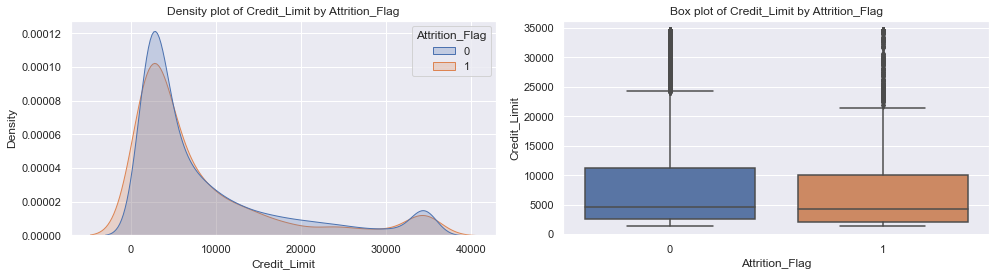

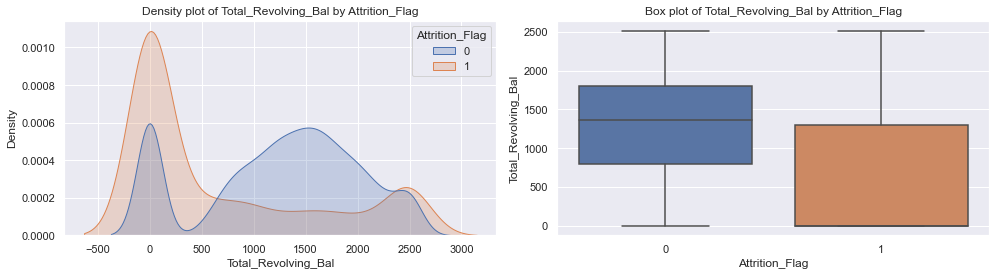

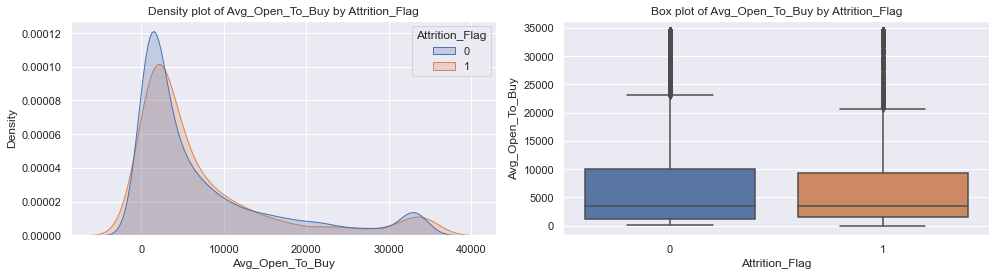

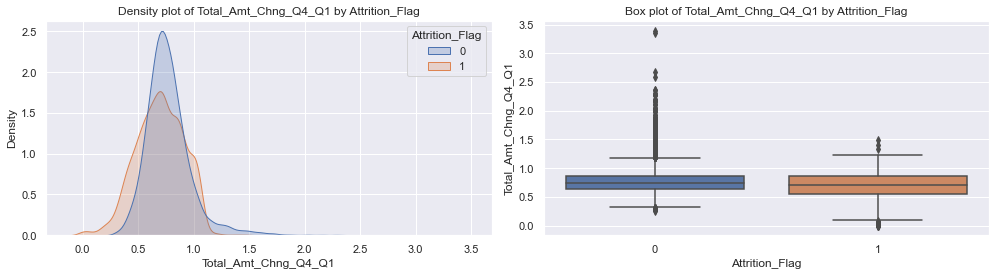

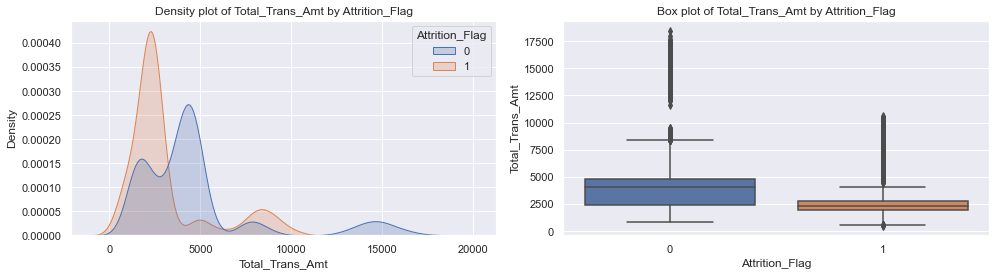

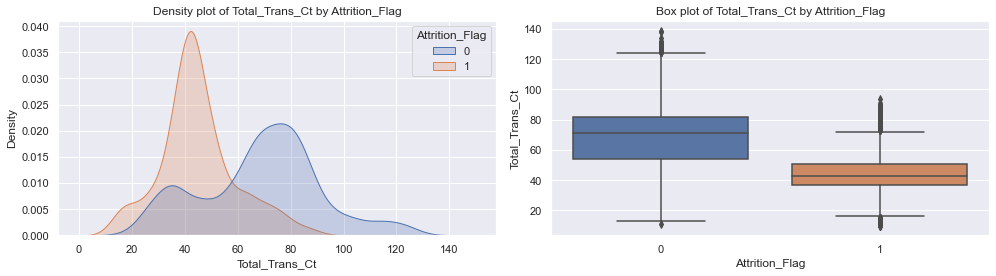

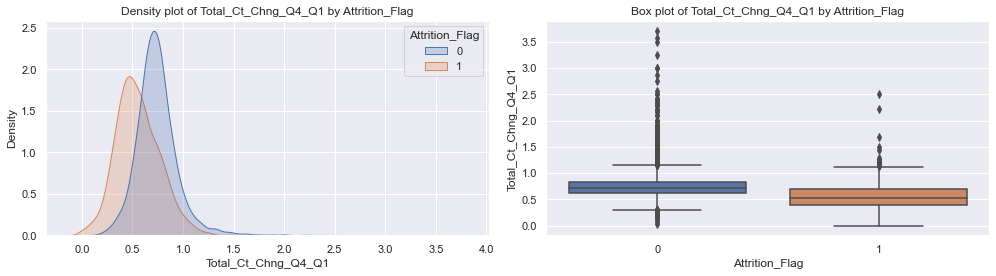

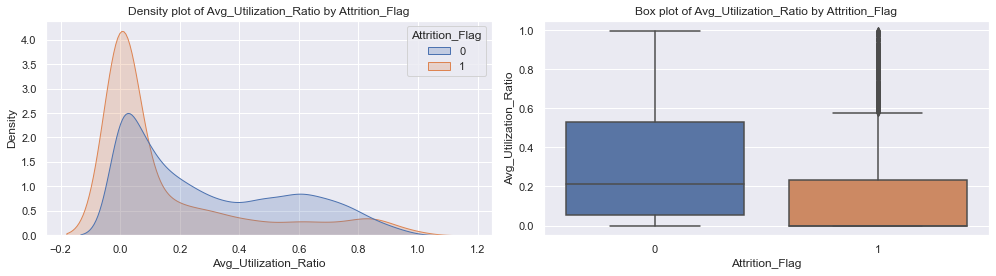

In [23]:
for col in contin_cols:
    helpers.plot_continuous(df, col, 'Attrition_Flag')

**Key Observations:**
- Customers with lower revolving balances are more likely to churn.
- Customers with lower transaction balances are more likely to churn. Though for customers with a balance of 7500-10000, churn is more likely to happen here.
- Customers with lower transaction counts are more likely to churn.
- Customers with lower utilisation are more likely to churn.

Next I'll plot the Correlation Matrix, to get a sense of which variables appear to influence Customer Churn the most.

#### Correlation Matrix

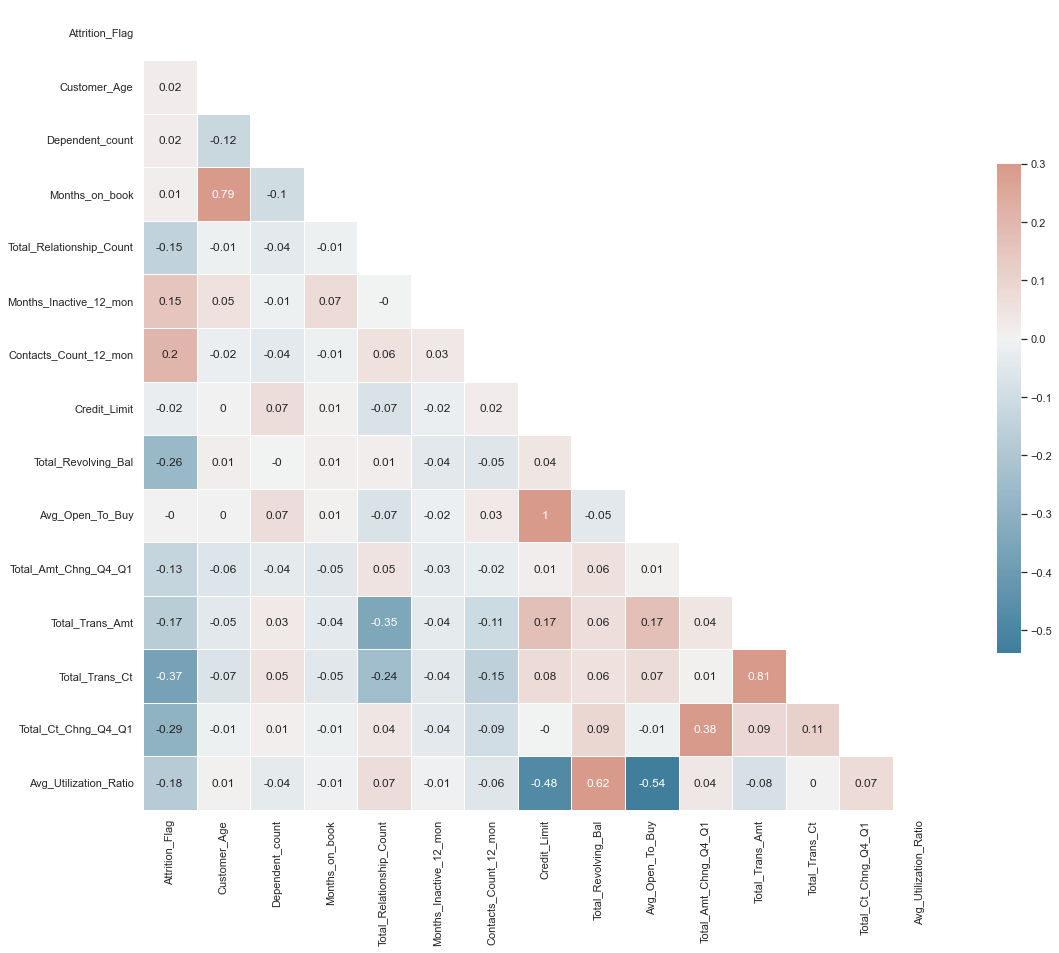

In [17]:
# Set Theme

sns.set_theme(style="white")

# Calculate correlations

corr = df.corr()

# Mask for top triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
           annot=np.round(corr.values,2))

plt.show()

The above shows me that Total_Trans_Ct, Total_Ct_Chng_Q4_Q1 and Total_Revolving_Bal have the strongest negative correlation with the target variable. Which indicates that customer activity may be the best predictor of whether they will churn or not, and it looks to have less bearing on features such as age, period of relationship with bank and credit limit.

Some key themes that can be taken out from this EDA, is that customers that show less activity using their products, are more likely to churn. This may be due to the clients intention of winding up, and is intentionally moving money and activity to another bank. Additionally, customers with a higher number of dependents are more likely to stay. This may be because a customer doesn't have the time to search for other options.

Regardless of the reasons, it would be beneficial for this bank to set up systems of identifying these trends, and applying some intervention to re-engage the customer. Though it should be noted that too much contact may be counterproductive.

## Modeling <a id='modeling'></a>

### Pre-Processing <a id='pre-processing'></a>

##### Encoding

I'll apply Ordinal Encoding on Educational Level, Card Category and Income Category. Placing the 'Unknown' variable as the lowest value, to signify least importance, and subsequently have the lowest impact on model training.

In [18]:
# Educational Level - Set Categories

ordinal = OrdinalEncoder(categories=[['Unknown', 'Uneducated', 'High School', 
                                      'College', 'Graduate', 'Post-Graduate',
                                     'Doctorate']])

# Fit on Dataframe

df['Education_Level'] = ordinal.fit_transform(df[['Education_Level']])

In [19]:
# Card Category - Set Categories

ordinal = OrdinalEncoder(categories=[['Blue', 'Silver', 'Gold', 'Platinum']])

# Fit on Dataframe

df['Card_Category'] = ordinal.fit_transform(df[['Card_Category']])

In [20]:
# Income Category - Set Categories

ordinal = OrdinalEncoder(categories=[['Unknown', 'Less than $40K', '$40K - $60K',
                                     '$60K - $80K', '$80K - $120K', '$120K +']])

# Fit on Dataframe

df['Income_Category'] = ordinal.fit_transform(df[['Income_Category']])

As gender is binary, I'll preprocess that column without the use of a package.

In [21]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'M' else 0)

I'll apply One Hot Encoding on Marital Status. To do this, we'll use pandas get_dummies().

In [22]:
# Get Dummies

df = pd.get_dummies(df)

###### Features and Target Variables

Creating the Feature and Target Variables

In [23]:
# Create X & Y

y = df.Attrition_Flag
X = df.drop('Attrition_Flag', axis=1)

##### Train Test Split

The data will be split up, one split, known as the train set will be to train the model. The other set is the test set, which will be used to test the model.

I'll split 70/30, with the use of stratify, which ensures an even split of target variable outcomes between the two splits.

In [24]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                   random_state=0, stratify=y)

###### Standardise

I'll standardise our data when training each model, by use of Pipeline() and StandardScaler().

### Model Selection <a id='model_selection'></a>

The business problem is to successfully predict if a customer will churn. I need to consider what our model should focus on in terms of a performance metric.

When the model predicts that a customer will churn, they should then be targeted with the appropriate strategy to reduce their chance of churning.

Let's consider the *cost* of when the model predicts a False Positive and False Negative.

**False Positive**

The model would classify this customer to churn, the business would then target the customer with the strategy to prevent churn. Though if this client wasn't going to churn, the targeted strategy will most likely have little impact. 

**False Negative**

The model wouldn't classify this customer to churn, the business would do nothing, the customer may proceed to churn. The business has now lost a customer, without any intervention.

The cost of applying an approved strategy to a customer would be much smaller than the cost of losing the customer. Based on this, we should be looking to build a model that minimises the False Negatives. The performance metric for this is **Recall**. 

Though looking at the Recall score in isolation wouldn't be advised, as we still don't want a model that predicts many False Positives. As a result, we'll make use of the **F1** as the primary scoring metric. We can then seek to optimise the model for higher Recall, depending on the businesses’ appetite.

###### Baseline Models

The below cell contains all the models we'll train for our initial benchmark and comparison.

In [25]:
# Base Learners - Stacking

base_learners = [
                 ('XGBoost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                 ('AdaBoost', AdaBoostClassifier()),
                 ('Random Forest', RandomForestClassifier(random_state=0))
                ]

# List of baseline models

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(random_state=0)),
    ('Random Forest', RandomForestClassifier(random_state=0)),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('GaussianNB', GaussianNB()),
    ('AdaBoost', AdaBoostClassifier()),
    ('XGBoost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('CatBoost', CatBoostClassifier(random_seed=0, verbose=False)),
    ('ExtraTree', ExtraTreesClassifier()),
    ('Stacking', StackingClassifier(estimators=base_learners, 
                                    final_estimator=CatBoostClassifier(random_seed=0, verbose=False)))
    
]

I've created a function below that will be used to test each model against each other, while using different sampling methods. As we have an imbalanced dataset, it will be useful to test different sampling methods to see if there is an increase in performance.

In [26]:
# Create Function for model comparison

def model_comparision(models, sampler=''):
    
    # Dictionary to hold scores
    models_scores = {}
    
    # Loop through each model
    for model in models:
        
        # Steps for pipeline - Include sampler if passed into function
        if sampler:
            steps = [('scaler', StandardScaler()), ('sampler', sampler), model]
        else:
            steps = [('scaler', StandardScaler()), model]
            
        # Create Pipeline
        pipeline = Pipeline(steps)

        # Train model
        model_trained = pipeline.fit(X_train, y_train)

        # Predictions
        y_pred = model_trained.predict(X_test)

        # Store model and test recall in dictionary
        models_scores[model[0]] = [np.round(metrics.f1_score(y_test, y_pred), 4),
                                   np.round(metrics.recall_score(y_test, y_pred), 4),
                                   np.round(metrics.precision_score(y_test, y_pred), 4),
                                   np.round(metrics.roc_auc_score(y_test, y_pred), 4),
                                   np.round(metrics.accuracy_score(y_test, y_pred), 4),                                
                                   ]
        
    # Convert dictionary to dataframe

    model_scores_df = pd.DataFrame.from_dict(models_scores, orient='index', 
                                             columns=['F1', 'Recall', 'Precision', 'AUC', 'Accuracy'])

    # Sort Values

    model_scores_df = model_scores_df.sort_values(by='F1', ascending=False)
    
    return(model_scores_df)

In [27]:
# Baseline
print('*'*10 + ' Baseline Model Comparision ' + '*'*10)
model_comparision(models)

********** Baseline Model Comparision **********


,F1,Recall,Precision,AUC,Accuracy
CatBoost,0.9134,0.8750,0.9553,0.9336,0.9733
XGBoost,0.8996,0.8627,0.9397,0.9261,0.9691
Stacking,0.8924,0.8586,0.9290,0.9230,0.9668
AdaBoost,0.8584,0.8135,0.9085,0.8989,0.9569
Random Forest,0.8565,0.7828,0.9455,0.8871,0.9579
Decision Tree,0.7924,0.7664,0.8202,0.8671,0.9355
Support Vector Machine,0.7494,0.6496,0.8855,0.8168,0.9302
ExtraTree,0.7485,0.6189,0.9467,0.8061,0.9332
Logistic Regression,0.6722,0.5840,0.7917,0.7773,0.9085
GaussianNB,0.6535,0.6086,0.7055,0.7800,0.8963


CatBoost and XGBoost out of the box have scored very well on our test data, followed closely by the Stacking Ensemble I put together. Random Forest and AdaBoost have decent scores, though they perform much more poorely on Recall compared to the first three.

Next I'll apply some sampling methods to see if an improvement in baseline scores can be found.

### Sampling Methods

For the purpose of this analysis, I'll test out 3 different sampling methods. All these methods are from the Imblearn packages.

- RandomOverSampler
- RandomUnderSampler
- SMOTEN

In [28]:
# Create Sampler Objects

ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)
smote = SMOTE(random_state=0, sampling_strategy=1.0)

In [29]:
# RandomOverSampler

print('*'*10 + ' RandomOverSampler Model Comparision ' + '*'*10)
model_comparision(models, ros)

********** RandomOverSampler Model Comparision **********


,F1,Recall,Precision,AUC,Accuracy
CatBoost,0.9207,0.9160,0.9255,0.9509,0.9747
XGBoost,0.9121,0.9037,0.9207,0.9444,0.9720
Random Forest,0.8730,0.8381,0.9109,0.9112,0.9608
AdaBoost,0.8294,0.9016,0.7679,0.9248,0.9404
Support Vector Machine,0.7883,0.8545,0.7316,0.8973,0.9263
Decision Tree,0.7809,0.7520,0.8119,0.8594,0.9322
ExtraTree,0.7419,0.6066,0.9548,0.8005,0.9322
Stacking,0.7317,0.5840,0.9794,0.7908,0.9312
K-Nearest Neighbors,0.6377,0.7828,0.5380,0.8271,0.8572
Logistic Regression,0.6318,0.8176,0.5148,0.8351,0.8470


In [30]:
# RandomUnderSampler

print('*'*10 + ' RandomUnderSampler Model Comparision ' + '*'*10)
model_comparision(models, rus)

********** RandomUnderSampler Model Comparision **********


,F1,Recall,Precision,AUC,Accuracy
CatBoost,0.8840,0.9529,0.8245,0.9570,0.9599
XGBoost,0.8641,0.9447,0.7962,0.9492,0.9523
Random Forest,0.8537,0.9508,0.7746,0.9489,0.9477
Stacking,0.8481,0.9324,0.7778,0.9407,0.9464
AdaBoost,0.8292,0.9201,0.7546,0.9314,0.9391
ExtraTree,0.8166,0.9078,0.7420,0.9237,0.9345
Support Vector Machine,0.7394,0.8607,0.6481,0.8856,0.9026
Decision Tree,0.7329,0.8996,0.6183,0.8967,0.8947
Logistic Regression,0.6370,0.8074,0.5260,0.8341,0.8523
K-Nearest Neighbors,0.6287,0.8361,0.5037,0.8392,0.8414


In [31]:
# SMOTE

print('*'*10 + ' SMOTE Model Comparision ' + '*'*10)
model_comparision(models, smote)

********** SMOTE Model Comparision **********


,F1,Recall,Precision,AUC,Accuracy
CatBoost,0.9143,0.8852,0.9453,0.9377,0.9733
XGBoost,0.9018,0.8750,0.9303,0.9312,0.9694
Random Forest,0.8686,0.8463,0.8920,0.9134,0.9589
Stacking,0.8685,0.8525,0.8851,0.9156,0.9585
AdaBoost,0.8415,0.8811,0.8052,0.9202,0.9467
ExtraTree,0.8153,0.7418,0.9050,0.8635,0.9460
Support Vector Machine,0.7839,0.8176,0.7528,0.8831,0.9276
Decision Tree,0.7824,0.8033,0.7626,0.8777,0.9283
Logistic Regression,0.6459,0.8074,0.5383,0.8374,0.8578
K-Nearest Neighbors,0.6332,0.8135,0.5183,0.8344,0.8486


In [32]:
ada = ADASYN(random_state=0, n_neighbors=5)

print('*'*10 + ' ADASYN Model Comparision ' + '*'*10)
model_comparision(models, ada)

********** ADASYN Model Comparision **********


,F1,Recall,Precision,AUC,Accuracy
CatBoost,0.9085,0.8852,0.9330,0.9365,0.9714
XGBoost,0.9047,0.8852,0.9251,0.9358,0.9701
Stacking,0.8837,0.8873,0.8801,0.9321,0.9625
Random Forest,0.8642,0.8545,0.8742,0.9155,0.9569
ExtraTree,0.8388,0.7889,0.8953,0.8856,0.9513
AdaBoost,0.8282,0.8791,0.7828,0.9162,0.9414
Support Vector Machine,0.7785,0.8463,0.7208,0.8918,0.9227
Decision Tree,0.7674,0.8012,0.7363,0.8732,0.9220
Logistic Regression,0.6227,0.8320,0.4975,0.8356,0.8381
K-Nearest Neighbors,0.6137,0.8156,0.4920,0.8272,0.8351


RandomOverSampling provided the largest impact on our baseline models. Looking at CatBoost, it's improved the test F1 score to 0.92, and recall to 0.92.

Prior to picking which model to use, I'll use cross validation on the top 4 performers after applying Random Over Sampling.

### Cross Validation

Applying cross validation to the top 4 models above (CatBoost, XGBoost, Random Forest, AdaBoost)

In [33]:
# Create Dictionary to store models

models = {
        'CatBoost': CatBoostClassifier(random_seed=0, verbose=False),
        'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'Random Forest': RandomForestClassifier(random_state=0),
        'AdaBoost': AdaBoostClassifier()

}

# Loop through each model, printing average recall score for 5 fold cross validation

for model in models:
    
    # Create Pipeline
    
    pipeline = Pipeline([('transformer', StandardScaler()), ('sampler', ros), ('estimator', models[model])])
    
    # Cross Validation - 5 Folds
    
    print(f'{model} - 5 Fold CV - Average F1')
    print(np.mean(cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')))
    print('*'*50)

CatBoost - 5 Fold CV - Average F1
0.913406095316809
**************************************************
XGBoost - 5 Fold CV - Average F1
0.9002479493195565
**************************************************
Random Forest - 5 Fold CV - Average F1
0.8622837302443866
**************************************************
AdaBoost - 5 Fold CV - Average F1
0.8260982157108382
**************************************************


Cross Validation confirms that the initial baseline scores weren't due to random chance on how the data was initially split. This gives me the confidence to make the decision to use CatBoost as the final model.

### Model Building

Based on the above work, I'll be using CatBoost as the model to predict whether or not a customer will churn. This next section will be building it out entirely, including further fine tuning to improve the F1 and Recall score.

In [34]:
# Set Parameters

params = {
        'random_seed': 0,
        'verbose': 200,
        'learning_rate': 0.06769487291726708,
        'depth': 10,
        'l2_leaf_reg': 8.57433418306558,
        'boosting_type': 'Ordered',
         }

# Model

cb = CatBoostClassifier(**params)

# Pipeline

pipeline = Pipeline([('transformer', StandardScaler()), 
                     ('sampler', ros), 
                     ('estimator', cb)])

# Fit

pipeline.fit(X_train, y_train)

0:	learn: 0.6103541	total: 136ms	remaining: 2m 15s
200:	learn: 0.0329530	total: 22.6s	remaining: 1m 29s
400:	learn: 0.0192874	total: 45s	remaining: 1m 7s
600:	learn: 0.0113063	total: 1m 7s	remaining: 45.1s
800:	learn: 0.0071337	total: 1m 30s	remaining: 22.4s
999:	learn: 0.0056637	total: 1m 52s	remaining: 0us


Pipeline(steps=[('transformer', StandardScaler()),
                ('sampler', RandomOverSampler(random_state=0)),
                ('estimator',
                 <catboost.core.CatBoostClassifier object at 0x00000234FD83FD60>)])

Accuracy : 0.9997 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9982 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
F1 Score : 0.9991
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


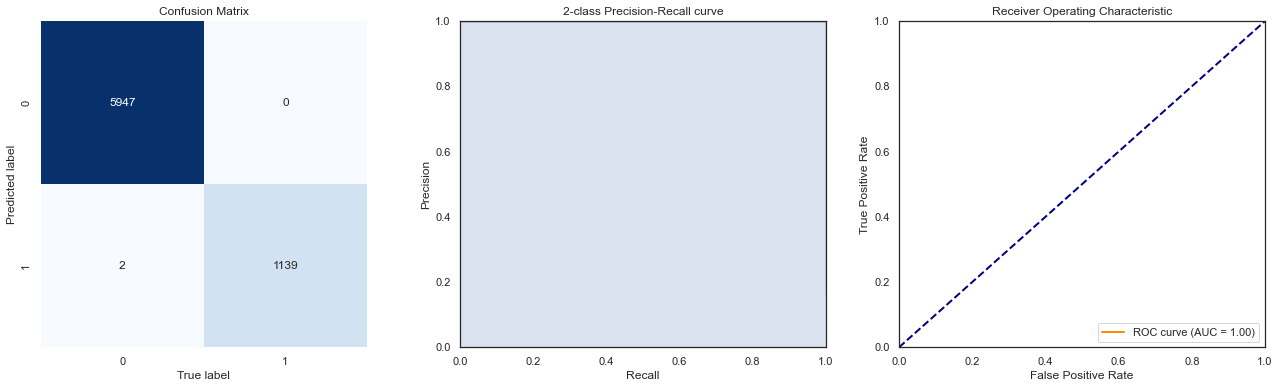

In [35]:
# Train Predictions
y_train_pred = pipeline.predict(X_train)
y_train_prob = pipeline.predict_proba(X_train)

# Display Train Results
show_summary_report(y_train, y_train_pred, y_train_prob)

Accuracy : 0.9770 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9391 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9160 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9953                                                                     Best: 1, Worst: < 0.5
F1 Score : 0.9274
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


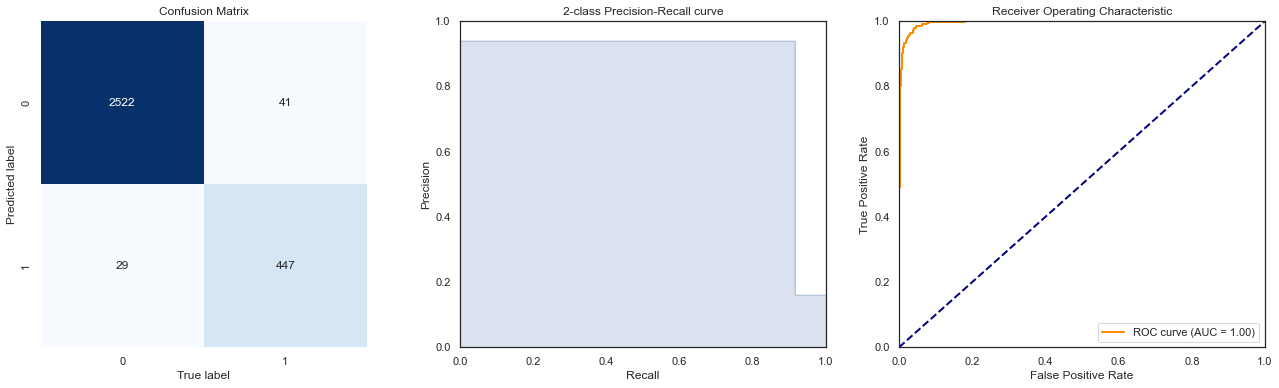

In [36]:
# Test Predictions
y_test_pred = pipeline.predict(X_test)
y_test_prob = pipeline.predict_proba(X_test)

# Display Test Results
show_summary_report(y_test, y_test_pred, y_test_prob)

In [37]:
# Set Parameters

params = {
    'n_estimators': 658,
    'criterion': 'friedman_mse',
    'max_depth': 5,
    'min_samples_split': 0.017209668061883378,
    'max_features': 'sqrt',
    'learning_rate': 0.050497537295197764
         }

# Model

cb = xgb.XGBClassifier(**params)

# Pipeline

pipeline = Pipeline([('transformer', StandardScaler()), 
                     ('sampler', ada), 
                     ('estimator', cb)])

# Fit

pipeline.fit(X_train, y_train)

[09:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Pipeline(steps=[('transformer', StandardScaler()),
                ('sampler', ADASYN(random_state=0)),
                ('estimator',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, criterion='friedman_mse',
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.050497537295197764, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_features='sqrt', max_leaves=0,
                               min_child_weight=1,
                               min_samples_split=0.017209668061883378,
                               missing=nan, monotone_constraints='()',
                               n_estimators=658, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', ...))])

### Hyperparameter Tuning

In [38]:
# Define a Standard Scalar to normalise inputs
scaler = StandardScaler()

# Params

params = {
        'random_seed': 0,
        'verbose': False,
         }

# Model

cb = CatBoostClassifier(**params)

# Pipeline

pipe = Pipeline(steps=[("scaler", scaler), ('ros', ros), ("cat", cb)])

# Pipeline Parameters
param_grid = {
    "cat__depth": [5],
    "cat__learning_rate": [0.050497537295197764],
    "cat__l2_leaf_reg": [658],
    "cat__boosting_type": []
}

# Search
search = GridSearchCV(pipe, param_grid)

# Fit
search.fit(X_train, y_train)

# Ouput
print(search.best_params_)

ValueError: Parameter grid for parameter 'cat__boosting_type' need to be a non-empty sequence, got: []

In [ ]:
# Train Predictions
y_train_pred = search.predict(X_train)
y_train_prob = search.predict_proba(X_train)

# Display Train Results
show_summary_report(y_train, y_train_pred, y_train_prob)

In [ ]:
# Test Predictions
y_test_pred = search.predict(X_test)
y_test_prob = search.predict_proba(X_test)

# Display Test Results
show_summary_report(y_test, y_test_pred, y_test_prob)

## Conclusion <a id='conclusion'></a>

In [ ]:
### TODO
# Describe the categorical variables DONE
# Standardise DONE
# Encoding Categorical Variables (One Hot and Ordinal) DONE
# Scatter Plots (Transaction Amount/Count)
# Balance Data
# Train/Test Split DONE
# Model Building In DONE
# Model Selection In DONE
# Hyperparameter Tuning
# Binning
# PCA